# **Celebrity Popularity on the Internet** 

Here is my pet project on using Pandas to analyze and visualize publicly available datasets. Here, I downloaded CSV files from Wikipedia and Forbes websites. 




### Student Information 

I am Rock, a senior Physics student and this is my little project for my Data Science skills.

## Part 0. Data ingest
In the folder "Data", there are two (2) CSV files: 

* Forbes Celebrity List from 1999-2017 [forbes_celebrity_100_w_title.csv] 
* Wikipedia Edits for the Celebrity Pages [wikipedia_edits_forbes_celebrity_100.csv] 

First, you need to make a copy of these files and save it to a folder in your own Google Drive. 

The code cells below will (1) mount your Google Drive and (2) load these CSV files from your Google Drive folder.

When you run the cell below, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

'Aubry-Andre Model review.gdoc'
'Bootcamp Onboarding'
 Certificates
'Colab Notebooks'
'Course Pack for Distribution'
'Data and Computation Lab'
'Excel Practice'
'FORM5_2018-05248-1st Sem 22-23.pdf'
'Legal Docs'
'Math 40'
'NIP D&C Shared Drive'
 Photocards
'Physics 117'
'Physics 131'
'Physics 132'
'Physics 142'
'Physics 151'
'Physics 152'
'Physics 180'
'Physics 191'
'Physics 225'
'Python Notebook'
'Resume 2022.gdoc'
'Resume 2022.pdf'
'ROTC FILES'
 Trash
 UniversityPhysicsVolume1-OP.pdf
'Untitled spreadsheet.gsheet'
'UP DSSoc'
'[UPPA] Salazar, Sameuel Rock - Form5.pdf'


Define the directory path to the location of the file, i.e. if it is in a 
folder named "Exam" under My Drive, then the file path will be "/content/drive/My Drive/Exam". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/Data and Computation Lab/Data/"

Now, we can load the file using  **pandas' read_csv** function below.


In [ ]:
import numpy as np
import pandas as pd

df1 = pd.read_csv(file_path + 'forbes_celebrity_100_w_title.csv', index_col = 0) # index_col sets the first column as the index of the data frame
df2 = pd.read_csv(file_path + 'wikipedia_edits_forbes_celebrity_100.csv', index_col = 0)

Print out the first couple of rows.

In [ ]:
df1.head()

,Rank,Recipient,Country,Career,Tied,Title
Year,,,,,,
1999,1,Michael Jordan,United States,Sportsperson (Basketball),0,Michael_Jordan
1999,2,Oprah Winfrey,United States,Television Personality,0,Oprah_Winfrey
1999,3,Leonardo DiCaprio,United States,Actor,0,Leonardo_DiCaprio
1999,4,Jerry Seinfeld,United States,Actor,0,Jerry_Seinfeld
1999,5,Steven Spielberg,United States,Filmmaker,0,Steven_Spielberg


In [ ]:
df2.head()

,parentid,revid,timestamp,user,userid,size
title,,,,,,
50_Cent,794562766,794834439,2017-08-10T09:15:54Z,Mr Alvini,31659070.0,128809
50_Cent,794453546,794562766,2017-08-08T19:35:55Z,Cydebot,1215485.0,128791
50_Cent,794391530,794453546,2017-08-08T03:44:08Z,Jprg1966,543434.0,128783
50_Cent,794350761,794391530,2017-08-07T18:55:09Z,Nastradumas 2001,25735662.0,129588
50_Cent,794350732,794350761,2017-08-07T13:27:03Z,Nastradumas 2001,25735662.0,129588


## PART 1. Data Preparation

Merge the two datasets using the "title" column following this rule: Match the Wikipedia Edits record to the Forbes Celebrity List record that is the topmost rank ever for the given celebrity; in case of a tie in the rank, use the record with the most recent year.



In [ ]:
# Merging the datasets using pd.merge
df3 = df1.merge(df2, left_on = 'Title', right_on = 'title', how = 'inner')
# Here we have the two dataframes as arguments, df1 on the left, and df2 on the right
# However, the common keys between them are named Title and title respectively
# Since python is case-sensitive, these two strings differ and thus no intersection of data could be found
# That's why, We employ left_on and right_on with the differing indexes as arguments so the computer will know what should be the basis of intersection
# the how = 'inner' ensures the intersection of data between two sets only

# Basically, we matched titles from forbes to wikipedia, a one-to-many correspondence, 
# with edit entries of wikipages of celebrities listed in Forbes Top 100 Celebrities


In [ ]:
df3.head()

,Rank,Recipient,Country,Career,Tied,Title,parentid,revid,timestamp,user,userid,size
0,1,Michael Jordan,United States,Sportsperson (Basketball),0,Michael_Jordan,794017254,794831507,2017-08-10T08:46:12Z,Jon Kolbert,29727696.0,132812
1,1,Michael Jordan,United States,Sportsperson (Basketball),0,Michael_Jordan,793938155,794017254,2017-08-05T08:40:23Z,Cydebot,1215485.0,132810
2,1,Michael Jordan,United States,Sportsperson (Basketball),0,Michael_Jordan,793246647,793938155,2017-08-04T21:00:59Z,Cydebot,1215485.0,132802
3,1,Michael Jordan,United States,Sportsperson (Basketball),0,Michael_Jordan,793246338,793246647,2017-07-31T15:22:47Z,Rikster2,3077044.0,132794
4,1,Michael Jordan,United States,Sportsperson (Basketball),0,Michael_Jordan,793246222,793246338,2017-07-31T15:20:18Z,Rikster2,3077044.0,132794


## PART 2. Data Analysis and Visualization

### A. Career Rankings

Rank careers based on (1) volume of users, (2) frequency of edits, and (3) “avidness of fans” (i.e., average no. of edits per user). Also, discuss any pre-processing that you performed for this problem.

Show table with top 5 careers for each of these criteria. What insights can we get from these results? 

In [ ]:
df3 = df3.set_index('Career')
df3

,Rank,Recipient,Country,Tied,Title,parentid,revid,timestamp,user,userid,size
Career,,,,,,,,,,,
Sportsperson (Basketball),1,Michael Jordan,United States,0,Michael_Jordan,794017254,794831507,2017-08-10T08:46:12Z,Jon Kolbert,29727696.0,132812
Sportsperson (Basketball),1,Michael Jordan,United States,0,Michael_Jordan,793938155,794017254,2017-08-05T08:40:23Z,Cydebot,1215485.0,132810
Sportsperson (Basketball),1,Michael Jordan,United States,0,Michael_Jordan,793246647,793938155,2017-08-04T21:00:59Z,Cydebot,1215485.0,132802
Sportsperson (Basketball),1,Michael Jordan,United States,0,Michael_Jordan,793246338,793246647,2017-07-31T15:22:47Z,Rikster2,3077044.0,132794
Sportsperson (Basketball),1,Michael Jordan,United States,0,Michael_Jordan,793246222,793246338,2017-07-31T15:20:18Z,Rikster2,3077044.0,132794
...,...,...,...,...,...,...,...,...,...,...,...
Musician,8,Coldplay,United Kingdom,0,Coldplay,390522,395804,2002-10-28T13:49:14Z,Tzartzam,3624.0,1600
Musician,8,Coldplay,United Kingdom,0,Coldplay,390486,390522,2002-10-28T13:34:09Z,194.129.155.141,0.0,1561
Musician,8,Coldplay,United Kingdom,0,Coldplay,389035,390486,2002-10-27T21:34:13Z,Tarquin,83.0,1555


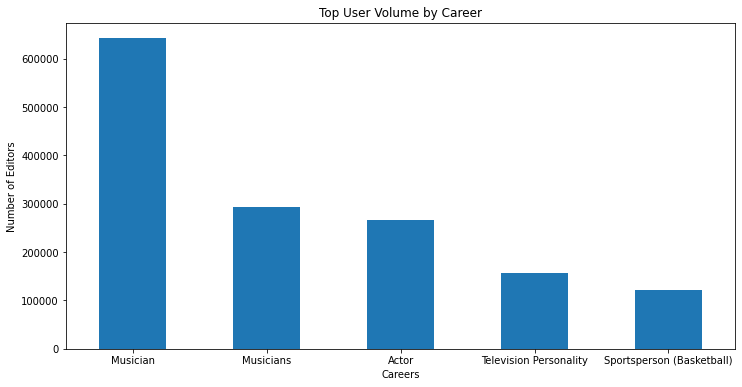

In [ ]:
# (1) Ranking careers based on volume of users

# Since the previous Data Frames are written in terms of entries,
# We use a pivot table to express it in terms of careers, a pivot table expresses a independent variable as index/rows, and the dependent variables as columns
df4a1 = df3.pivot_table(index= "Career", aggfunc= np.count_nonzero) # We change the function to counting non-zero terms

# Then we only select the column of users
N_users = df4a1['user'] # This then shows, the number of users, thus, the user volume for each careers, we call this N_users


# We can define all these succeeding steps as a single function
def Rock_super_top5_users(dataframe, xlabel, ylabel, title):
  df_sorted = dataframe.sort_values(ascending= False) # From this we extract the top 5 greatest user counts, so we sort values in descending order, 
  df_top5 = df_sorted.head() # Then we slice out the first 5 rows, df.head does that for us,

  graph = df_top5.plot.bar(y= 'user', rot=0, figsize= (12, 6)) # We make a bar graph to visualize this for us
  graph.set_xlabel(xlabel)
  graph.set_ylabel(ylabel)
  graph.set_title(title)
  return graph

# So we have a neat function for use, that gives a bar graph of the Top 5 of the concise data frame
Rock_super_top5_users(N_users, 'Careers', 'Number of Editors', 'Top User Volume by Career')

# Insights
# Based on the edits of Wikipedia Pages of the Celebrities in Forbes' 'Top 10 Celebrities from 1999-2017', 
# The most editors were from the celebrities by their Musician career.
# This is also to distinguish from the succeeding career, the far second, named Musician(s), which are the group acts.
# On the other hand, the 5th most user volume are from the Basketball personalities.
# This graph shows which careers have the most contributors on their wikipedia articles.

In [ ]:
# Checker
N_users.describe()

count        14.000000
mean     136926.642857
std      170869.216563
min        7476.000000
25%       27865.000000
50%       87863.000000
75%      147282.250000
max      642285.000000
Name: user, dtype: float64

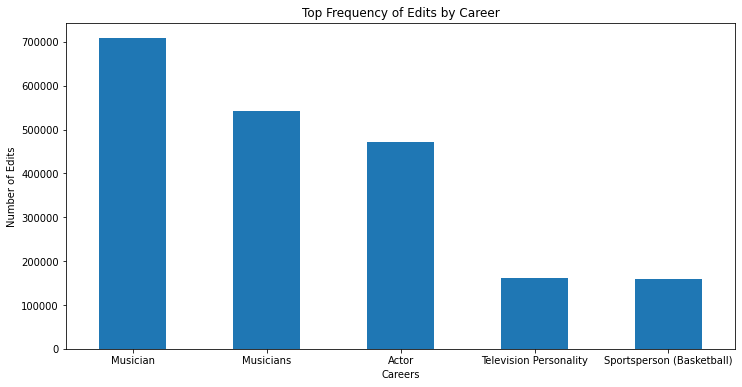

In [ ]:
# (2) Frequency of Edits for each Career
df4a2 = df4.pivot_table(index= "Career", columns= "user", aggfunc= np.count_nonzero) 
# This pivot table counts the edits entries per user on every career

N_edits = df4a2.count(axis= 1) # Counting elements in each row (by career), we have the number of edits on each career, we call this N_edits

# We use the neat function
Rock_super_top5_users(N_edits, 'Careers', 'Number of Edits', 'Top Frequency of Edits by Career')


# Insights
# Compared to the previous table, this is now the total of edits on the Wikipedia articles of celebrities in Forbes' lists.
# Although we still the same careers and their rankings, their differences with each other changed.
# Particularly, if we are talking about the number of edit entries, the group acts, Musician(s), now came closer to the first.
# We also see a substantial increase on the Actors. 
# Thus, it must be that their entries are more from the same fans, over and over.

In [ ]:
# Checker cell
N_edits.describe()


count        14.000000
mean     189968.428571
std      217222.610217
min       32461.000000
25%       61740.250000
50%       91179.000000
75%      161364.500000
max      708433.000000
dtype: float64

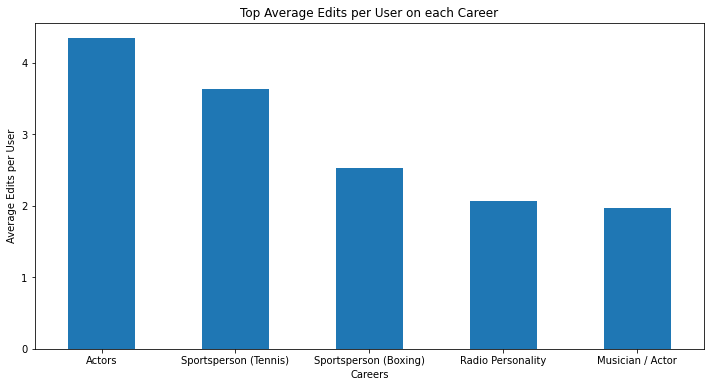

In [ ]:
# Avidness of fans (Average number of edits per user)

# To calculate the average number of edits per user, 
# We will have to know the number of users on each career, which we got as N_users
# Then we also know the number of edits on each career, which is N_edits

# Thus the average,
average = N_edits/N_users

# And the awesome function
Rock_super_top5_users(average, 'Careers', 'Average Edits per User', 'Top Average Edits per User on each Career')

# Insights
# This graph shows the top-most average edits per user on each Career. 
# Now considering the whole data set, we now have the most edits per user on the Acting celebrities. 
# They have an average of more than 4 edits per user.
# Sportspeople's fans now entered the Top 5, particularly, from Tennis and Boxing. There's also the Radio personalities.
# This just shows which careers have the most avid fans, showing how updated their fans on their idol's endeavours.

In [ ]:
# Checker Cell
df4a = df4.drop_duplicates('userid')
df4A = df4a.pivot_table(index= "Career", aggfunc= np.count_nonzero)
N_unique = df4A['user']


In [ ]:
# CHecker cell no.2
average.describe()


count    14.000000
mean      1.887893
std       1.062444
min       0.321116
25%       1.156289
50%       1.805954
75%       2.043458
max       4.342028
dtype: float64

### B. Super-fan rankings

Define super-fans for a celebrity to be those users with the highest number of edits for that celebrity's page. Rank fans based on this metric and identify the top 5 super-fans. Show table with the user info, celebrity info, and super-fan metric. What insights can we get from these results? 

Input a celebrity Eminem


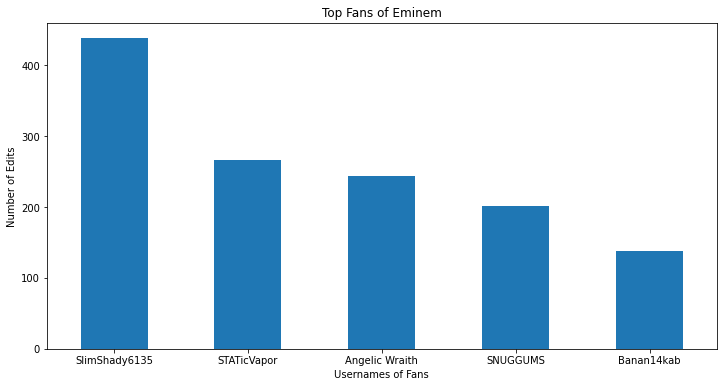

In [ ]:
# Again we make a pivot table of user edits, in terms of their celebrity pages
b = df4.pivot_table(values= 'title', index= 'Recipient', columns= 'user' , aggfunc= np.count_nonzero) 
# What's different here is we employed 'title' as values, 'user' as columns, since they have the same numerical count (as shown on the succeeding cell).
# But we need to see the individual contributors as columns, that's why we included 'title' as the value that we see in the graph


# Thus to find the fans for a certain celebrity, we just select a single row, a certain celebrity
Celebrity = input('Input a celebrity ', )
B = b.loc[Celebrity] # though this loc function erases the other details of that Celebrity

# Awesome function
Rock_super_top5_users(B, 'Usernames of Fans', 'Number of Edits', 'Top Fans of ' + Celebrity )

# Insights on Pacquiao's Top Fans
# Here we can see the Top 5 contributors of Manny Pacquiaos' Wikipedia Page.
# It is surprising to see that they contributed on his article for hundreds of times.
# With the Top Fan, with username Luisztdt had over 250 edits. Well, it is understandable that editing is such a tedious task.
# But not for these people, as they show their contributions to their celebrity. Kudos to their hard work.

In [ ]:
# Checker Cell
B.describe()
# Check

count    7113.000000
mean        2.734430
std         9.478599
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       438.000000
Name: Eminem, dtype: float64

In [ ]:
B

user
!!House Down!!   NaN
!dea4u           NaN
!llu$ion^        NaN
$CyBeRwIz$       NaN
$hadow Grinch    NaN
                  ..
金翅大鹏鸟            NaN
阿濃               NaN
黄雨伞              NaN
하늘모래             NaN
😂                NaN
Name: Eminem, Length: 189732, dtype: float64

### C. Timeseries of edits

Compare the timeseries of edits for Manny Pacquio and Floyd Mayweather. Show one or more plots, with proper labels. What insights can we get from these results? 

Recipient                 object
timestamp    datetime64[ns, UTC]
user                      object
dtype: object


Text(0.5, 1.0, 'Number of edits from 2004-2017')

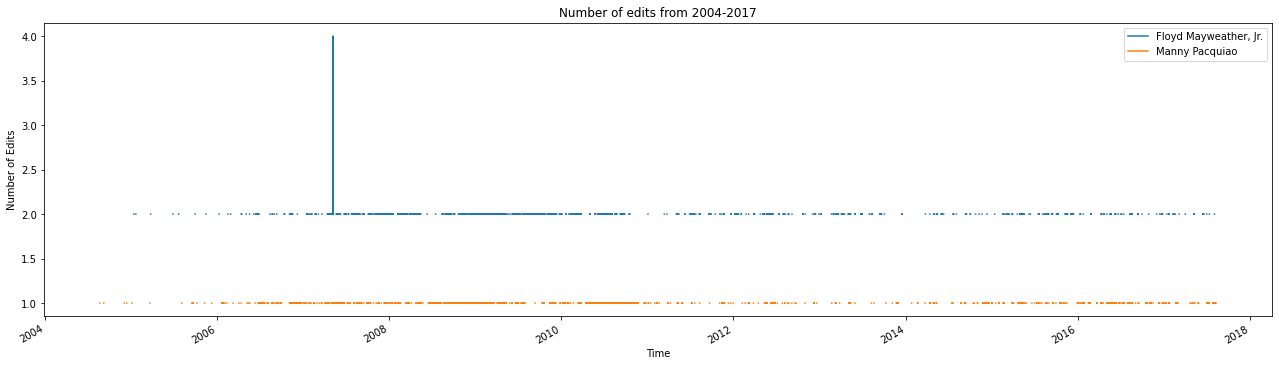

In [ ]:
# Now we go back to the original dataframe df4, 
# First, We need to convert the datastamps into  datetype64 suitable for numpy operations
# df4 = df4.sort_values('timestamp', axis = 0, ascending = True)
df4['timestamp'] = pd.to_datetime(df4['timestamp'])

df4_sliced = df4[["Recipient", 'timestamp', 'user']] # Since we only need the Recipients andtimestamps, users are for numerical values later on


print(df4_sliced.dtypes) # To check if the time data is already in datetime64 format

# Here, we again prepare a pivot table of Recipients as rows (so we can easily slice Floyd and Manny)
# Timestamps as columns since we will show the intervals in the plots
# Lastly, we designate usernames as values of the table such that for any time interval, there will be a number of edits made within it.
# That's why we're using np.count_nonzero again to count those edit entries
df4_sliced_pivot = df4_sliced.pivot_table(values= 'user', index = 'Recipient', columns = 'timestamp', aggfunc= np.count_nonzero)


# We slice Floyd's and Manny's as separate series for separate plots
# This always gives 1-dimensional series, since we basically isolate an entire row
Floyd = df4_sliced_pivot.loc['Floyd Mayweather, Jr.']
Manny = df4_sliced_pivot.loc['Manny Pacquiao']

# Then, we merge them again so we could deal with it as one unit
FloydvManny = pd.merge(Floyd, Manny, right_index = True,
               left_index = True)

# Now plotting Manny and Floyd's edit timestamps

import matplotlib.pyplot as plt

FloydvManny.plot(figsize= (22, 6))
plt.xlabel("Time")
plt.ylabel("Number of Edits")
plt.title('Number of edits from 2004-2017')

# Then, we get this simple plot of edits of Manny and Floyd from 2004 to 2017
# We can see that we  have a regular number of edits for Manny's and Floyd's.
# This is reasonable since they're just constantly updating their articles
# It also shows how sparse the edits are before 2007, and after 2010s. That's why I chose not to interpolate this early.
# We can also infer when the prime of their careers started, with The Ring magazine had ranked Mayweather and Pacquiao as 1st and 2nd pound-for-pound fighters.

Text(0.5, 1.0, 'Floyds sudden spike of edits, May 6 2007, 4:43 AM UTC')

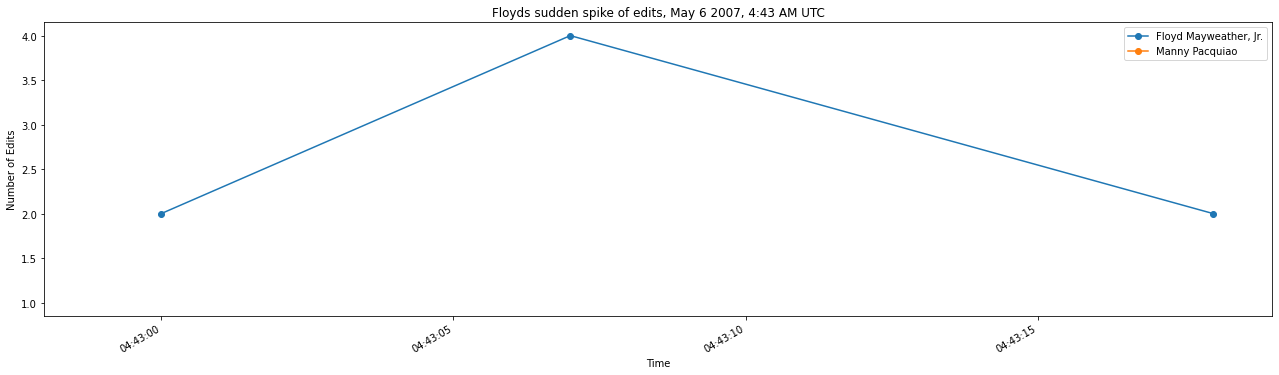

In [ ]:
# Rescaling the plot, zooming into Floyd's spike

FloydvManny.plot(figsize= (22, 6), marker= 'o')


start = pd.to_datetime('2007-05-06T04:42:58')
end = pd.to_datetime('2007-05-06T04:43:19')


plt.xlim(start, end)
plt.xlabel("Time")
plt.ylabel("Number of Edits")
plt.legend(['Floyd Mayweather, Jr.', 'Manny Pacquiao'])
plt.title('Floyds sudden spike of edits, May 6 2007, 4:43 AM UTC')

# Insights
# Here we can see when the spike of edit entries of Floyd happened from the averages of 2 entries, to 4 user entries
# This may just be a collaborative effort of editors on his article in May 6 2007, 
# It is just after his historic win against Oscar De La Hoya, with only a split-decision, garnering his first superwelterweight belt.

Text(0.5, 1.0, 'Cumulative Number of Edits')

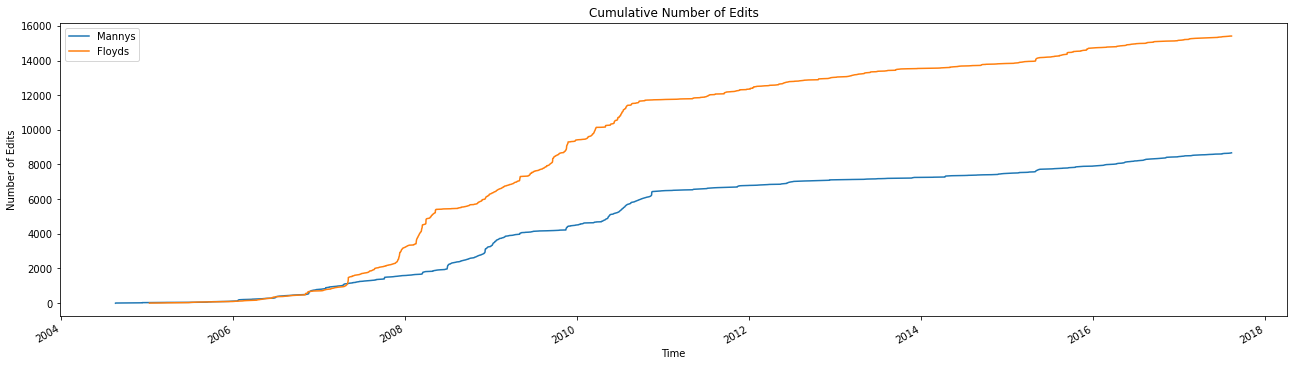

In [ ]:
# We can also try seeing the cumulative sums of their edits
# Adding two new columns for the cumulatives
FloydvManny['Floyds'] = FloydvManny["Floyd Mayweather, Jr."].cumsum()
FloydvManny['Mannys'] = FloydvManny["Manny Pacquiao"].cumsum()

FloydvManny2 = FloydvManny.interpolate(method= 'time') # This way we fill in the breaks in the plot

FloydvManny2.plot(y = ['Mannys', 'Floyds'], figsize= (22,6))
plt.xlabel("Time")
plt.ylabel("Number of Edits")
plt.title('Cumulative Number of Edits')
# Insights
# Prior to 2007, their edits were still fledgling articles as they are still making their name for themselves,
# Floyd's then shoot up during his bout with De La Hoya, one of the most watched fights in boxing history
# Manny's, meanwhile had just won his rematch against Barrera
# The next inflection point, we can see is just before the year 2011, where both of their growth stagnated.
# This is the time when Pacquiao was already a 7-division World Champion, only defending his titles and winning another againts Clottey.
# On the other hand, Mayweather also slowed down in his bouts, only fighting once or twice a year.
# Also notable is their Fight of the Century in 2015, most paid boxing fight in history, but was widely regarded as a letdown by critics.
# We can therefore conclude that the growth of their Wikipedia articles, frim the regular updates, is tied closely with their professional careers.

In [ ]:
# Descriptive Statistics
FloydvManny.describe()

#

,"Floyd Mayweather, Jr.",Manny Pacquiao,Floyds,Mannys
count,7705.000000,8673.0,7705.000000,8673.000000
mean,2.000260,1.0,7707.823491,4337.000000
std,0.022785,0.0,4449.051276,2503.823776
min,2.000000,1.0,2.000000,1.000000
25%,2.000000,1.0,3856.000000,2169.000000
50%,2.000000,1.0,7708.000000,4337.000000
75%,2.000000,1.0,11560.000000,6505.000000
max,4.000000,1.0,15412.000000,8673.000000


## D. Create your own data visualization

For this part, explore the dataset and create data visualization(s) (min. of 1, max. of 3) that show an interesting insight from the data. Feel free to choose your "favorite" celebrity or celebrities for this task. :)

**D1**

Type a GOAT Beyonce
Who is the usurper Britney Spears


(<matplotlib.axes._subplots.AxesSubplot at 0x7f72bb4e7590>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72bb8e6f50>)

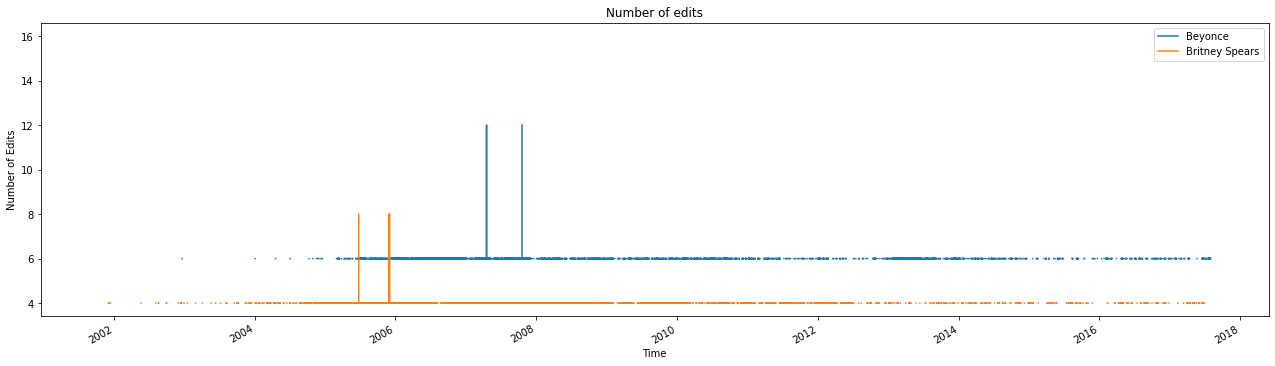

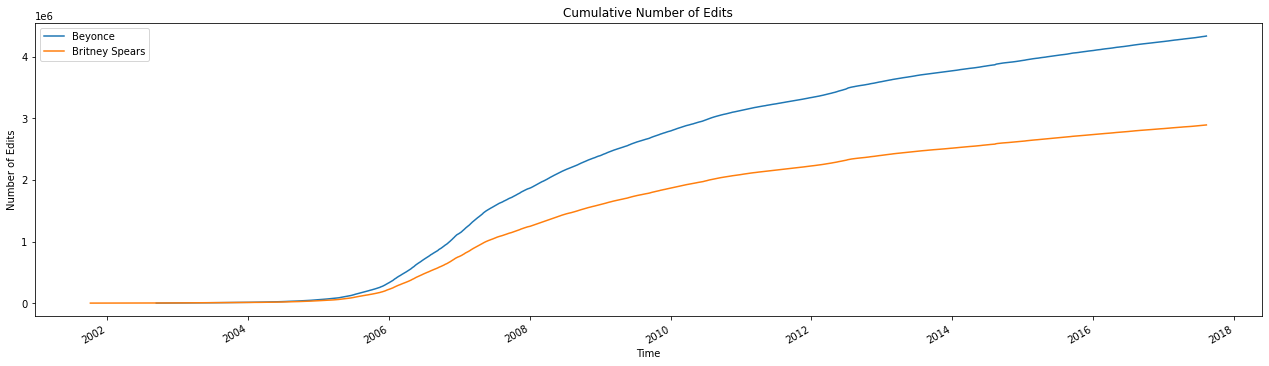

In [ ]:

# Inspired by Problem C, I reckon from these timeseries edits, what can settle the GOAT Debate
Celebrity = input('Type a GOAT ', )
Celebrity2 = input('Who is the usurper ', )

def Rock_super_whos_the_GOATer(Celebrity, Celebrity2):
 slice1 = df4_sliced_pivot.loc[Celebrity]
 slice2 = df4_sliced_pivot.loc[Celebrity2]

 graph = pd.merge(slice1, slice2, right_index = True,
               left_index = True)

 plot1 = graph.plot(figsize= (22, 6))
 plt.xlabel("Time")
 plt.ylabel("Number of Edits")
 plt.title('Number of edits')

 graph2 = graph.interpolate(method = 'time')

 graph2[ Celebrity ] = graph2[Celebrity].cumsum()
 graph2[ Celebrity2 ] = graph2[Celebrity2].cumsum()

 plot2 = graph2.plot(y = [Celebrity , Celebrity2 ], figsize= (22,6))
 plt.xlabel("Time")
 plt.ylabel("Number of Edits")
 plt.title('Cumulative Number of Edits')
 return plot1, plot2

Rock_super_whos_the_GOATer(Celebrity, Celebrity2)

# I compared Lionel Messi and Cristiano Ronaldo,
# Well according to the timeseries data, more users are engaged with Ronaldo's articles, by a wide margin, about quadruple the total number of edits
# Seems like more wikieditors will agree that CR7 is da GOAT. 
# Also more favors that Michael Jordan is the true King.
# Although a close match, Beyonce eventually inched forward, QUEEN BEE. I also noticed the orders of magnitude of their fan's edits, compared to athletes.

# Another insight but regarding the graphs
# I noticed that the logarithmic pattern are all evident in every celebrity's cumulative
# Maybe their growth is not caused by the happenings in the Icon's careers,
# but rather by the natural growth in users of Wikipedia as a whole.

**D2**

In [ ]:
# Inspired by Part A, but we compare Country Rankings

# Making the Data Frames
# First, since we only need to distinguish the Countries and its users as numerical value counts
# Note that the user's aren't necessarily from those countries, but the celebrities they support, which we omitted
df_geo =  df4[["Country", 'user']]

# To compensate for the inconsistencies between the Country names between this and the other dataframe below, 
# We pre=emptively, change on of those to compensate

# Since the geopanda dataframe lists USA as only United States, differing from our original data, 
# we shall rename first as one or the other to achieve intersection
df_geo['Country'] = df_geo['Country'].replace({'United States': 'United States of America', 'Republic of Ireland': 'Ireland', 'United Kingdom/Republic of Ireland': 'United Kingdom' })


# (1) By User Volume
Country_rank1 = df_geo.pivot_table(index= 'Country', columns= "user", aggfunc= np.count_nonzero) 
Country_User_Volume = Country_rank1.count(axis= 1) # This is to count unique users


# (2) By Edit Frequency

Country_rank2 = df_geo.pivot_table(index= 'Country', aggfunc= np.count_nonzero)
Country_Edit_Frequency = Country_rank2['user'] # This is to count edits as a whole

# (3) Average Edits per Country
Country_average = Country_Edit_Frequency/Country_User_Volume

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


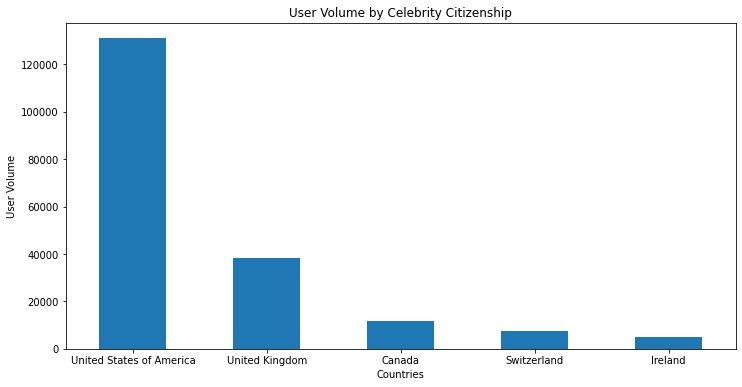

In [ ]:
# I'm having a hard time stacking three distinct graphs so I just separated their cells

Rock_super_top5_users(Country_User_Volume, 'Countries', 'User Volume', 'User Volume by Celebrity Citizenship')



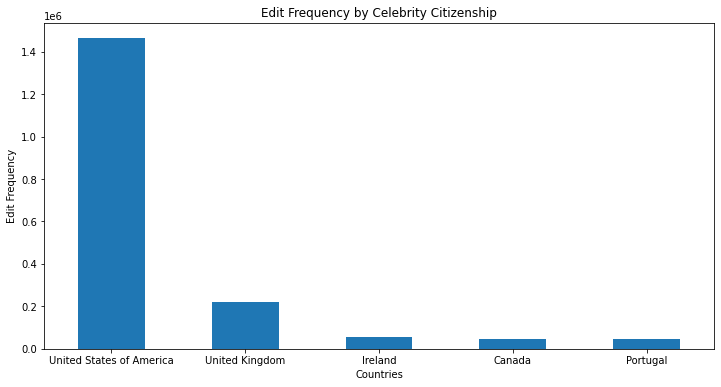

In [ ]:
Rock_super_top5_users(Country_Edit_Frequency, 'Countries', 'Edit Frequency', 'Edit Frequency by Celebrity Citizenship')

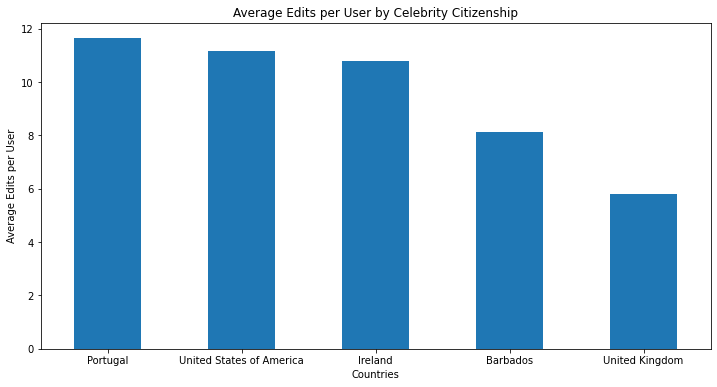

In [ ]:
Rock_super_top5_users(Country_average, 'Countries', 'Average Edits per User', 'Average Edits per User by Celebrity Citizenship')

# Insights
# From sheer volume of edits and users, compiling American Celebrities, it shows how dominant is the USA on the world's popular culture.
# By its size it is more than the other countries' celebrities combined.
# However, based on the average edits per user, it shows that Portugal's celebrities, more of the same users manage their articles.
# Seems like there's more avid fans following icons from Portugal, especially Cristiano Ronaldo

**D3**


In [ ]:
%pip install geopandas
import geopandas as gpd

#Read the world data and show the header
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

# To remove antartica, and other practically uninhabited places from the picture
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# We have this another dataframe, but we only need its Countries' names and its Geometries
world2 = world.reindex(columns = ['name','geometry'])



# Then, we merge it with each of the slices from before
merger1 = pd.merge(Country_User_Volume.rename('User Volume'), world2, left_on = 'Country', right_on = 'name', how = 'outer')
merger2 = pd.merge(Country_Edit_Frequency.rename('Edit Frequency'), world2,  left_on = 'Country' , right_on ='name', how = 'outer')
merger3 = pd.merge(Country_average.rename('Average Edits per User'), world2, left_on = 'Country', right_on = 'name', how = 'outer')
# Initially we encountered a ValueError, reminding us to rename the series before merging it with a dataframe
# We used outer join here so as to not drop the irrelevant countries and we would have a defined world map


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


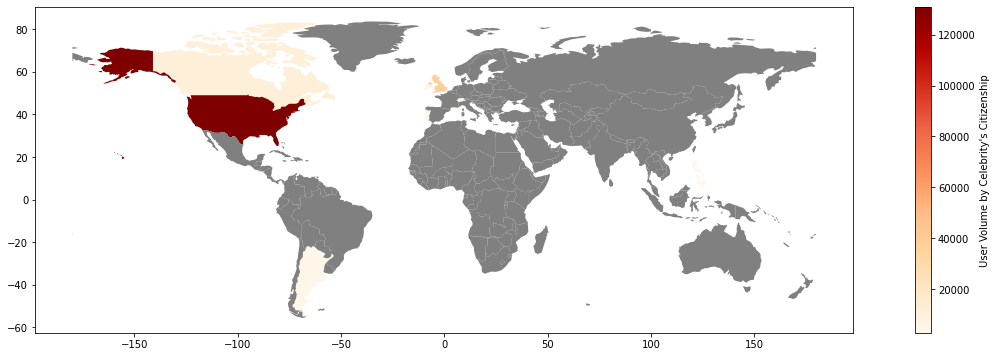

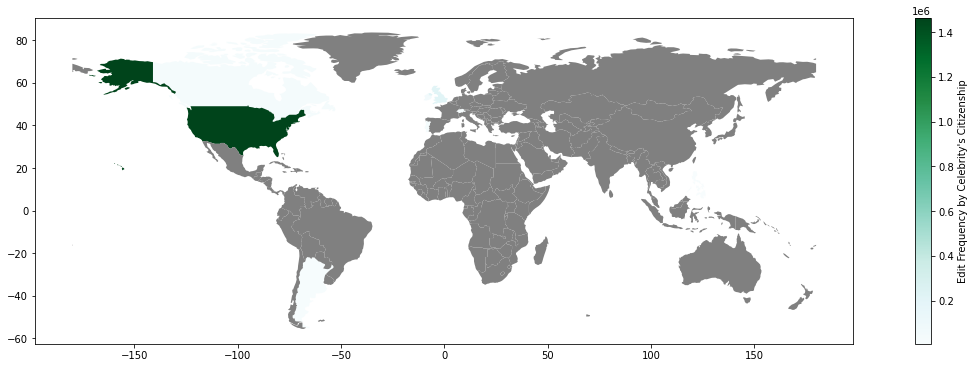

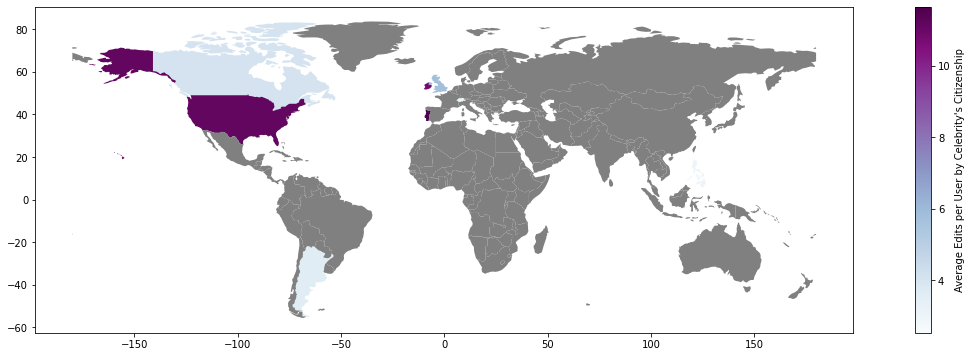

In [ ]:
# Now we can plot each on a world map
# But first, we have to make sure that they are a GeoDataFrame
merger_geo1 = gpd.GeoDataFrame(merger1)
merger_geo2 = gpd.GeoDataFrame(merger2)
merger_geo3 = gpd.GeoDataFrame(merger3)


merger_geo1.plot(column='User Volume', legend= True, figsize= (22,6), cmap='OrRd', missing_kwds= {'color': 'grey'}, 
                 legend_kwds={'label': "User Volume by Celebrity's Citizenship", 'orientation': "vertical"})

merger_geo2.plot(column='Edit Frequency', cmap='BuGn', legend= True, figsize= (22,6),  missing_kwds={'color': 'grey'},
                 legend_kwds={'label': "Edit Frequency by Celebrity's Citizenship", 'orientation': "vertical"})

merger_geo3.plot(column='Average Edits per User', cmap='BuPu' , legend= True, figsize= (22,6),  missing_kwds={'color': 'grey'}, 
                 legend_kwds={'label': "Average Edits per User by Celebrity's Citizenship", 'orientation': "vertical"})

# Insights
# Here we saw how the location of the popular icons are situated along the Atlantic.
# With the exception of the Philipines, which has a substantial internet presence.
# This is basically how heavily Westernized the popular culture is, based on WikiEdits of Forbes Annual Top 10 Celebrities from 1999-2017.